# Question 1

In [2]:
import pandas as pd

# Function to process a file and extract data as numeric types
def process_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    # Convert the content to a list of lines
    lines = content.split('\n')

    # Initialize lists to store extracted data
    matrix_sizes = []
    execution_times = []
    total_zeros = []

    # Iterate over lines to extract information
    for i, line in enumerate(lines):
        if "The matrix size is:" in line:
            matrix_size = int(line.split(':')[1].strip())  # Convert to integer
            matrix_sizes.append(matrix_size)
        elif "Time taken to count the number of zeros:" in line:
            execution_time = int(line.split(':')[1].strip().replace('milliseconds', ''))  # Convert to float
            execution_times.append(execution_time)
        elif "Total Number of zero-valued elements in the matrix:" in line:
            total_zero = int(line.split(':')[1].strip())  # Convert to integer
            total_zeros.append(total_zero)

    # Create a DataFrame from the extracted data
    df = pd.DataFrame({
        'Matrix Size': matrix_sizes,
        'Execution Time (ms)': execution_times,
        'Total Number of Zeros': total_zeros
    })

    return df

# Define the paths to your files
file_path_Dynamic = '../Assgn1-Dynamic-EE21BTECH11015/output.txt'
file_path_Mixed = '../Assgn1-Mixed-EE21BTECH11015/output.txt'
file_path_Chunk = '../Assgn1-Chunk-EE21BTECH11015/output.txt'

# Process each file and create the DataFrames
df_Dynamic = process_file(file_path_Dynamic)
df_Mixed = process_file(file_path_Mixed)
df_Chunk = process_file(file_path_Chunk)

# Display the dataframes to verify
print(df_Dynamic.head())
print(df_Mixed.head())
print(df_Chunk.head())


   Matrix Size  Execution Time (ms)  Total Number of Zeros
0         5000                   71               10000000
1         3000                   21                3600000
2         4000                   39                6400000
3         2000                    9                1600000
4         1000                    2                 400000
   Matrix Size  Execution Time (ms)  Total Number of Zeros
0         5000                  681               10000000
1         3000                  133                3600000
2         4000                  255                6400000
3         2000                   53                1600000
4         1000                   10                 400000
   Matrix Size  Execution Time (ms)  Total Number of Zeros
0         5000                   61               10000000
1         3000                   23                3600000
2         4000                   45                6400000
3         2000                   10                16000

In [3]:
df_Dynamic.sort_values('Matrix Size').reset_index(drop=True, inplace=True)
df_new = df_Dynamic.loc[:, ['Matrix Size','Total Number of Zeros']]
df_new

,Matrix Size,Total Number of Zeros
0,5000,10000000
1,3000,3600000
2,4000,6400000
3,2000,1600000
4,1000,400000


In [4]:
df_Mixed

,Matrix Size,Execution Time (ms),Total Number of Zeros
0,5000,681,10000000
1,3000,133,3600000
2,4000,255,6400000
3,2000,53,1600000
4,1000,10,400000


In [5]:
df_Chunk['method'] = 'Chunk'
df_Mixed['method'] = 'Mixed'
df_Dynamic['method'] = 'Dynamic'

# Combine the DataFrames
combined_df = pd.concat([df_Chunk, df_Mixed, df_Dynamic])

# Reset index if needed
combined_df.reset_index(drop=True, inplace=True)

print(combined_df)

    Matrix Size  Execution Time (ms)  Total Number of Zeros   method
0          5000                   61               10000000    Chunk
1          3000                   23                3600000    Chunk
2          4000                   45                6400000    Chunk
3          2000                   10                1600000    Chunk
4          1000                    2                 400000    Chunk
5          5000                  681               10000000    Mixed
6          3000                  133                3600000    Mixed
7          4000                  255                6400000    Mixed
8          2000                   53                1600000    Mixed
9          1000                   10                 400000    Mixed
10         5000                   71               10000000  Dynamic
11         3000                   21                3600000  Dynamic
12         4000                   39                6400000  Dynamic
13         2000                   

In [6]:
combined_df = combined_df.sort_values('Matrix Size')
print(combined_df)
combined_df['Execution Time (ms)'].dtype

    Matrix Size  Execution Time (ms)  Total Number of Zeros   method
4          1000                    2                 400000    Chunk
9          1000                   10                 400000    Mixed
14         1000                    2                 400000  Dynamic
3          2000                   10                1600000    Chunk
8          2000                   53                1600000    Mixed
13         2000                    9                1600000  Dynamic
1          3000                   23                3600000    Chunk
6          3000                  133                3600000    Mixed
11         3000                   21                3600000  Dynamic
2          4000                   45                6400000    Chunk
7          4000                  255                6400000    Mixed
12         4000                   39                6400000  Dynamic
0          5000                   61               10000000    Chunk
5          5000                  6

dtype('int64')

    Matrix Size  Execution Time (ms)  Total Number of Zeros   method
0          1000                    2                 400000    Chunk
1          1000                   10                 400000    Mixed
2          1000                    2                 400000  Dynamic
3          2000                   10                1600000    Chunk
4          2000                   53                1600000    Mixed
5          2000                    9                1600000  Dynamic
6          3000                   23                3600000    Chunk
7          3000                  133                3600000    Mixed
8          3000                   21                3600000  Dynamic
9          4000                   45                6400000    Chunk
10         4000                  255                6400000    Mixed
11         4000                   39                6400000  Dynamic
12         5000                   61               10000000    Chunk
13         5000                  6

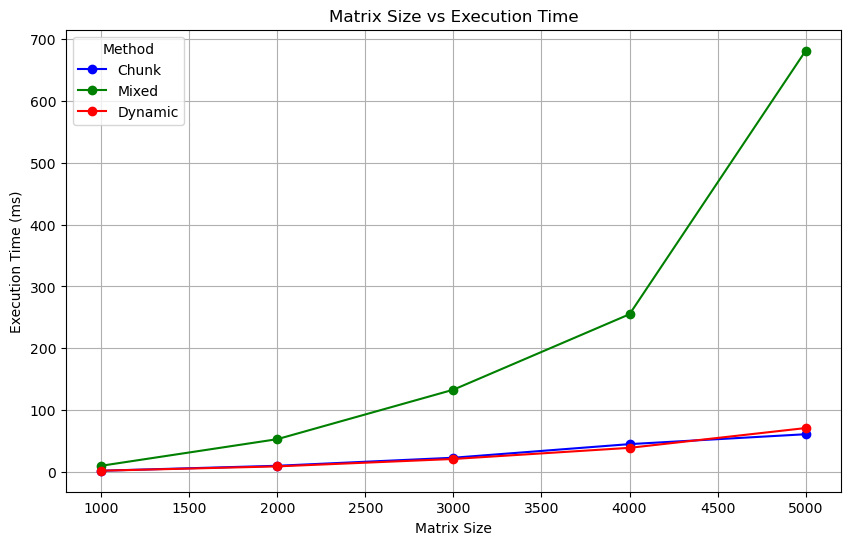

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
combined_df = combined_df.sort_values('Matrix Size')
combined_df.reset_index(drop=True, inplace=True)
print(combined_df)

# Plotting
plt.figure(figsize=(10, 6))

# Plot lines and markers for each method
for method, color in zip(['Chunk', 'Mixed', 'Dynamic'], ['blue', 'green', 'red']):
    subset = combined_df[combined_df['method'] == method]
    plt.plot(subset['Matrix Size'], subset['Execution Time (ms)'], marker='o', color=color, label=method, linestyle='-')

# Add labels and title
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (ms)')
plt.title('Matrix Size vs Execution Time')
plt.legend(title='Method')
plt.grid(True)

# Show plot
plt.show()


# Question 2

In [8]:
df['Time Taken (ms)'].dtype

NameError: name 'df' is not defined

In [9]:
import pandas as pd
import re

def extract_data(file_path):
    # Read data from file
    with open(file_path, 'r') as file:
        data = file.read()

    # Regular expressions to extract data
    matrix_size_re = re.compile(r"The matrix size is: (\d+)")
    threads_re = re.compile(r"Number of threads is: (\d+)")
    time_re = re.compile(r"Time taken to count the number of zeros: (\d+) milliseconds")

    # Data storage
    records = []

    # Variables to hold current state
    current_matrix_size = None
    current_threads = None
    time_taken = None

    # Extract information
    for line in data.splitlines():
        matrix_size_match = matrix_size_re.search(line)
        if matrix_size_match:
            current_matrix_size = int(matrix_size_match.group(1))
            continue

        threads_match = threads_re.search(line)
        if threads_match:
            current_threads = int(threads_match.group(1))
            continue

        time_match = time_re.search(line)
        if time_match:
            time_taken = int(time_match.group(1))
            # Add the record to the list
            records.append({
                'Matrix Size': current_matrix_size,
                'Number of Threads': current_threads,
                'Time Taken (ms)': time_taken
            })

    # Create DataFrame
    df = pd.DataFrame(records)
    return df

# File paths
file_path_Dynamic = '../Assgn1-Dynamic-EE21BTECH11015/output_threads.txt'
file_path_Mixed = '../Assgn1-Mixed-EE21BTECH11015/output_threads.txt'
file_path_Chunk = '../Assgn1-Chunk-EE21BTECH11015/output_threads.txt'

# Extract data for each file and create DataFrames
df_Dynamic = extract_data(file_path_Dynamic)
df_Mixed = extract_data(file_path_Mixed)
df_Chunk = extract_data(file_path_Chunk)

# Output DataFrames


In [10]:
df_Dynamic

,Matrix Size,Number of Threads,Time Taken (ms)
0,5000,2,206
1,5000,4,100
2,5000,8,76
3,5000,16,77
4,5000,32,77
5,3000,2,70
6,3000,4,37
7,3000,8,22
8,3000,16,28
9,3000,32,32


In [11]:
df_Mixed

,Matrix Size,Number of Threads,Time Taken (ms)
0,5000,2,1046
1,5000,4,534
2,5000,8,518
3,5000,16,395
4,5000,32,413
5,3000,2,371
6,3000,4,186
7,3000,8,120
8,3000,16,194
9,3000,32,207


In [12]:
df_Chunk

,Matrix Size,Number of Threads,Time Taken (ms)
0,5000,2,195
1,5000,4,99
2,5000,8,61
3,5000,16,78
4,5000,32,86
5,3000,2,69
6,3000,4,35
7,3000,8,22
8,3000,16,24
9,3000,32,25


In [13]:
df_Chunk['method'] = 'Chunk'
df_Mixed['method'] = 'Mixed'
df_Dynamic['method'] = 'Dynamic'

# Combine the DataFrames
combined_df = pd.concat([df_Chunk, df_Mixed, df_Dynamic])

# Reset index if needed
combined_df.reset_index(drop=True, inplace=True)

print(combined_df)

    Matrix Size  Number of Threads  Time Taken (ms)   method
0          5000                  2              195    Chunk
1          5000                  4               99    Chunk
2          5000                  8               61    Chunk
3          5000                 16               78    Chunk
4          5000                 32               86    Chunk
..          ...                ...              ...      ...
70         1000                  2                7  Dynamic
71         1000                  4                3  Dynamic
72         1000                  8                2  Dynamic
73         1000                 16                2  Dynamic
74         1000                 32                2  Dynamic

[75 rows x 4 columns]


    Matrix Size  Number of Threads  Time Taken (ms)   method
0          5000                  2              195    Chunk
4          5000                  2              206  Dynamic
5          5000                  2             1046    Mixed
15         5000                  4              534    Mixed
18         5000                  4              100  Dynamic
28         5000                  4               99    Chunk
30         5000                  8               76  Dynamic
38         5000                  8               61    Chunk
42         5000                  8              518    Mixed
46         5000                 16               78    Chunk
57         5000                 16              395    Mixed
59         5000                 16               77  Dynamic
60         5000                 32               77  Dynamic
63         5000                 32               86    Chunk
67         5000                 32              413    Mixed


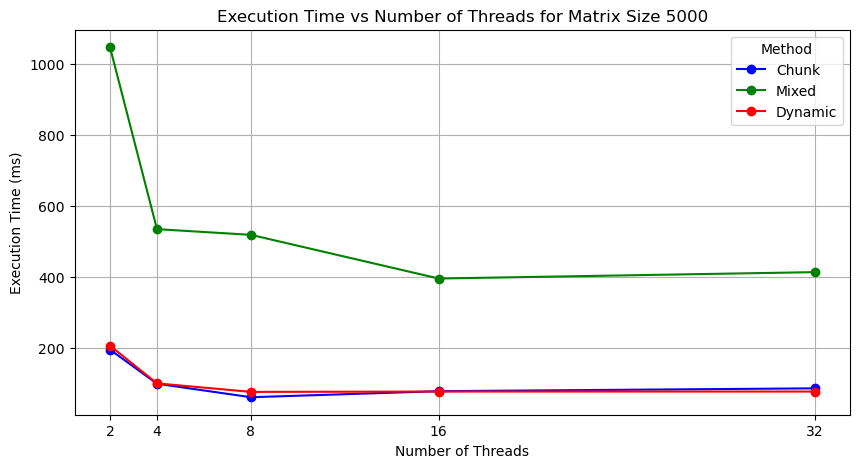

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combined_df is already defined and contains the necessary data
combined_df = combined_df.sort_values('Number of Threads')
combined_df.reset_index(drop=True, inplace=True)

# Filter the DataFrame for Matrix Size = 5000
filtered_df = combined_df[combined_df['Matrix Size'] == 5000]

print(filtered_df)

# Plotting
plt.figure(figsize=(10, 5))

# Plot lines and markers for each method
for method, color in zip(['Chunk', 'Mixed', 'Dynamic'], ['blue', 'green', 'red']):
    subset = filtered_df[filtered_df['method'] == method]
    plt.plot(subset['Number of Threads'], subset['Time Taken (ms)'], marker='o', color=color, label=method, linestyle='-')

# Add labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time vs Number of Threads for Matrix Size 5000')
plt.legend(title='Method')
plt.grid(True)

# Set the x-axis ticks
all_thread_values = combined_df['Number of Threads'].unique()  # Get all unique values of Number of Threads
plt.xticks(sorted(all_thread_values))  # Sort and set these as x-axis ticks

# Show plot
plt.show()


# Question 3

In [25]:
import pandas as pd
import re

def extract_data(file_path):
    # Read data from file
    with open(file_path, 'r') as file:
        data = file.read()

    # Regular expressions to extract data
    sparsity_re = re.compile(r"The sparsity is: (\d+)")
    time_re = re.compile(r"Time taken to count the number of zeros: (\d+) milliseconds")
    zeros_re = re.compile(r"Total Number of zero-valued elements in the matrix: (\d+)")
    
    # Data storage
    records = []

    # Variables to hold current state
    current_rowInc = None
    time_taken = None
    sparsity = None
    current_zeros = None
    
    # Extract information
    for line in data.splitlines():

        sparsity_match = sparsity_re.search(line)
        if sparsity_match:
            sparsity = int(sparsity_match.group(1))
            continue
            
        zeros_match = zeros_re.search(line)
        if zeros_match:
            current_zeros = int(zeros_match.group(1))
            continue
        
        time_match = time_re.search(line)
        if time_match:
            time_taken = int(time_match.group(1))
            # Add the record to the list
            records.append({
                'Sparsity(%)': sparsity,
                'Time Taken (ms)': time_taken,
                'Number of Zeros': current_zeros
            })

    # Create DataFrame
    df = pd.DataFrame(records)
    return df

# File paths
file_path_Dynamic = '../Assgn1-Dynamic-EE21BTECH11015/output_Sparse.txt'
file_path_Mixed = '../Assgn1-Mixed-EE21BTECH11015/output_Sparse.txt'
file_path_Chunk = '../Assgn1-Chunk-EE21BTECH11015/output_Sparse.txt'

# Extract data for each file and create DataFrames
df_Dynamic = extract_data(file_path_Dynamic)
df_Mixed = extract_data(file_path_Mixed)
df_Chunk = extract_data(file_path_Chunk)

print(df_Dynamic)


   Matrix Size  Sparsity(%)  Time Taken (ms)  Number of Zeros
0         5000         4000               74              NaN
1         5000         2000               62       20000000.0
2         5000         1000               80       10000000.0
3         5000         3000               72        5000000.0


In [22]:
df_Dynamic.sort_values('Matrix Size').reset_index(drop=True, inplace=True)
df_new = df_Dynamic.loc[:, ['Matrix Size','Number of Zeros']]
df_new

,Matrix Size,Number of Zeros
0,5000,NaN
1,5000,20000000.0
2,5000,10000000.0
3,5000,5000000.0


# Question 4

In [30]:
import pandas as pd
import re

def extract_data(file_path):
    # Read data from file
    with open(file_path, 'r') as file:
        data = file.read()

    # Regular expressions to extract data
    matrix_size_re = re.compile(r"The matrix size is: (\d+)")
    rowInc = re.compile(r"rowInc Value is: (\d+)")
    time_re = re.compile(r"Time taken to count the number of zeros: (\d+) milliseconds")

    # Data storage
    records = []

    # Variables to hold current state
    current_matrix_size = None
    current_rowInc = None
    time_taken = None

    # Extract information
    for line in data.splitlines():
        matrix_size_match = matrix_size_re.search(line)
        if matrix_size_match:
            current_matrix_size = int(matrix_size_match.group(1))
            continue

        rowInc_match = rowInc.search(line)
        if rowInc_match:
            current_rowInc = int(rowInc_match.group(1))
            continue

        time_match = time_re.search(line)
        if time_match:
            time_taken = int(time_match.group(1))
            # Add the record to the list
            records.append({
                'Matrix Size': current_matrix_size,
                'RowInc': current_rowInc,
                'Time Taken (ms)': time_taken
            })

    # Create DataFrame
    df = pd.DataFrame(records)
    return df

# File paths
file_path_Dynamic = '../Assgn1-Dynamic-EE21BTECH11015/output_rowIncrement.txt'
# file_path_Mixed = '../Assgn1-Mixed-EE21BTECH11015/output_rowIncrement.txt'
# file_path_Chunk = '../Assgn1-Chunk-EE21BTECH11015/output_rowIncrement.txt'

# Extract data for each file and create DataFrames
df_Dynamic = extract_data(file_path_Dynamic)
# df_Mixed = extract_data(file_path_Mixed)
# df_Chunk = extract_data(file_path_Chunk)

# Output DataFrames


In [31]:
df_Dynamic['method'] = 'Dynamic'

# Combine the DataFrames
combined_df = pd.concat([df_Dynamic])

# Reset index if needed
combined_df.reset_index(drop=True, inplace=True)
combined_df


,Matrix Size,RowInc,Time Taken (ms),method
0,5000,10,95,Dynamic
1,5000,20,101,Dynamic
2,5000,30,96,Dynamic
3,5000,40,91,Dynamic
4,5000,50,92,Dynamic
5,3000,10,41,Dynamic
6,3000,20,41,Dynamic
7,3000,30,36,Dynamic
8,3000,40,39,Dynamic
9,3000,50,39,Dynamic


    Matrix Size  RowInc  Time Taken (ms)   method
0          5000      10               95  Dynamic
5          5000      20              101  Dynamic
14         5000      30               96  Dynamic
18         5000      40               91  Dynamic
23         5000      50               92  Dynamic


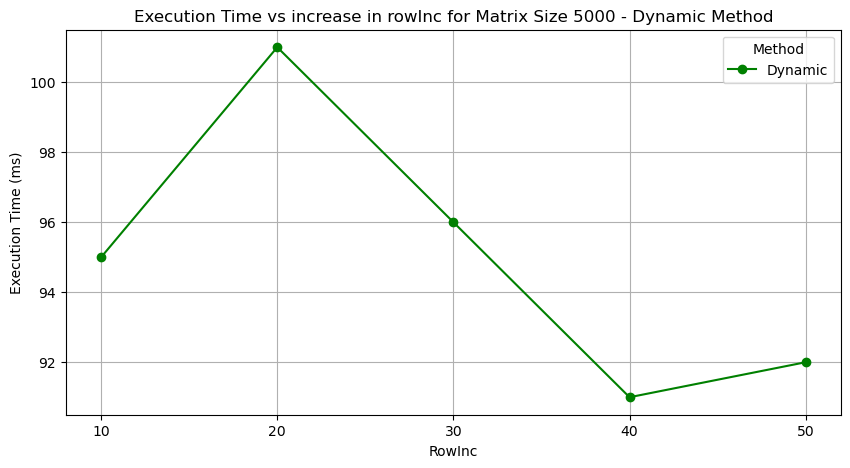

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combined_df is already defined and contains the necessary data
combined_df = combined_df.sort_values('RowInc')
combined_df.reset_index(drop=True, inplace=True)

# Filter the DataFrame for Matrix Size = 5000
filtered_df = combined_df[combined_df['Matrix Size'] == 5000]

print(filtered_df)

# Plotting
plt.figure(figsize=(10, 5))

# Plot lines and markers for each method
for method, color in zip(['Dynamic'], ['green']):
    subset = filtered_df[filtered_df['method'] == method]
    plt.plot(subset['RowInc'], subset['Time Taken (ms)'], marker='o', color=color, label=method, linestyle='-')

# Add labels and title
plt.xlabel('RowInc')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time vs increase in rowInc for Matrix Size 5000 - Dynamic Method')
plt.legend(title='Method')
plt.grid(True)

# Set the x-axis ticks
all_thread_values = combined_df['RowInc'].unique()  # Get all unique values of Number of Threads
plt.xticks(sorted(all_thread_values))  # Sort and set these as x-axis ticks

# Show plot
plt.show()
